In [1]:
from felpy.model.beamlines.exfel_spb.exfel_spb import Instrument
from felpy.utils.vis_utils import Grids
from PIL import ImageColor 
import numpy as np

exfel_c1 = 'red'
exfel_c2 = 'black'

In [2]:
spb = Instrument()

surfaces = []
x = []
y = []
 
for mirror in ["HOM1", "HOM2", "NHE", "NVE"]:
    surface, x1, y1 = spb.get_mirror_profile(mirror)
    surfaces.append(surface)
    x.append(x1)
    y.append(y1)

surfaces[2] *= 1e-09
surfaces[3] *= 1e-09
    

Initialising Single Particle Beamline


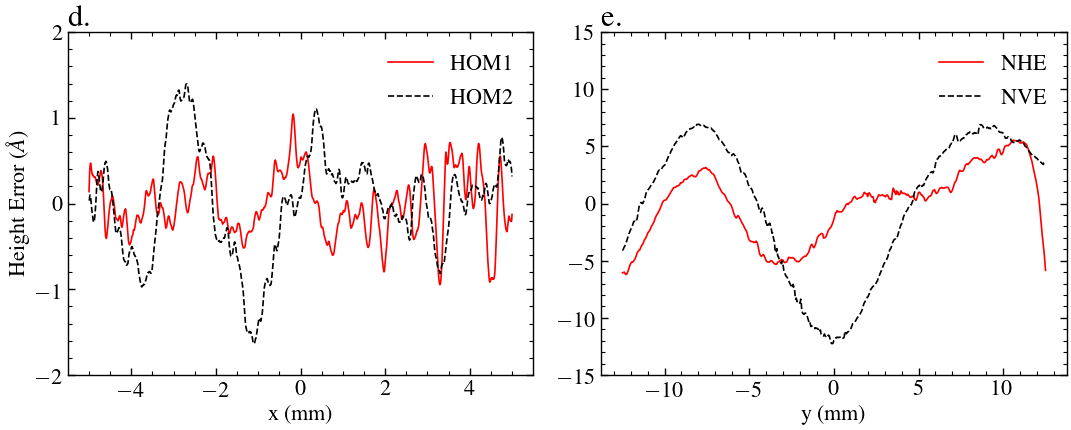

In [18]:
from matplotlib import pyplot as plt
fontsize = 16
plot = Grids(scale = 2, global_aspect = 2.5)
plot.create_grid(n = 1, m = 2, sharey = False, sharex = False)
plot.pad(3)

[ax1, ax2] = plot.axes.flatten()

ax1.set_ylabel("Height Error ($\AA$)")

ax1.plot(x[0][0:], surfaces[0][0,1:]*1e9 , label = "HOM1", color = exfel_c1) #lp HOM1
ax1.plot(x[1][1:], surfaces[1][0,0:]*1e9 , label = "HOM2", color = exfel_c2) #lp HOM2
ax1.legend(fontsize = 16, loc = 'upper right')

#ax2.set_xlabel("x (mm)")
#ax2.set_ylabel("Height Error (nm)")

ax2.plot(y[2][0:], surfaces[2][0,0:]*1e9-np.mean(surfaces[2][0,0:]*1e9), label = "NHE", color = exfel_c1)
ax2.plot(x[3][0:], surfaces[3][0,0:]*1e9-np.mean(surfaces[3][0,0:]*1e9), label = "NVE", color = exfel_c2)
ax2.legend(fontsize = 16, loc = 'upper right')

 
ax1.set_xlabel("x (mm)")
ax2.set_xlabel("y (mm)")

ax1.set_ylim(-2,2)
ax2.set_ylim(-15,15)

ax1.text(ax1.get_xlim()[0],ax1.get_ylim()[1],"d.", horizontalalignment = 'left', verticalalignment = 'bottom', fontsize = 22)
ax2.text(ax2.get_xlim()[0],ax2.get_ylim()[1],"e.", horizontalalignment = 'left', verticalalignment = 'bottom', fontsize = 22)

for ax in plot.axes.flatten():
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.label.set_size(fontsize)
        ax.yaxis.label.set_size(fontsize)
        
plot.fig.subplots_adjust(hspace=0.1)
plot.fig.savefig("./mirror_line_profiles.png")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


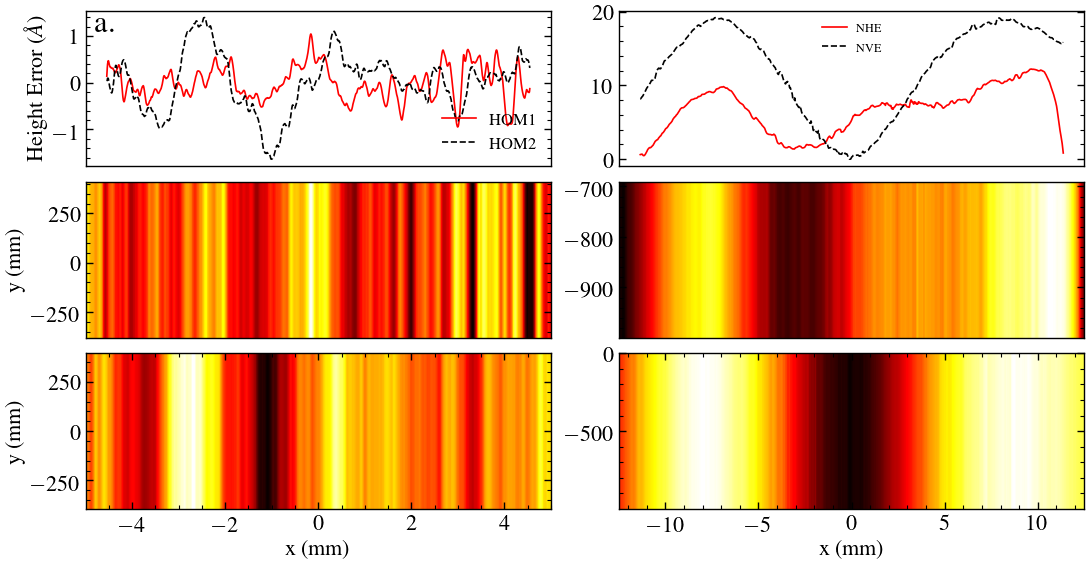

In [3]:
from matplotlib import pyplot as plt
fontsize = 16
plot = Grids(scale = 2, global_aspect = 1.85)
plot.create_grid(n = 3, m = 2, sharey = False, sharex = False)
plot.pad(3)

[ax1, ax2, ax3,ax4,ax5,ax6] = plot.axes.flatten()

ax1.set_ylabel("Height Error ($\AA$)")

ax1.plot(x[0][0:], surfaces[0][0,1:]*1e9 , label = "HOM1", color = exfel_c1) #lp HOM1
ax1.plot(x[1][1:], surfaces[1][0,0:]*1e9 , label = "HOM2", color = exfel_c2) #lp HOM2
ax1.legend(fontsize = fontsize-4)



ax3.imshow(surfaces[0], extent = [np.min(x[0]),np.max(x[0]),
                                  np.min(y[0]),np.max(y[0])],
          cmap = 'hot')

ax3.set_aspect('auto')

ax5.imshow(surfaces[1], extent = [np.min(x[1]),np.max(x[1]),
                                  np.min(y[1]),np.max(y[1])],
          cmap = 'hot')

ax5.set_aspect('auto')
ax5.set_xlabel("x (mm)")
ax5.set_ylabel("y (mm)")



#ax2.set_xlabel("x (mm)")
#ax2.set_ylabel("Height Error (nm)")

ax2.plot(y[2][0:], surfaces[2][0,0:]*1e9, label = "NHE", color = exfel_c1)
ax2.plot(x[3][0:], surfaces[3][0,0:]*1e9, label = "NVE", color = exfel_c2)
ax2.legend()

ax4.imshow(surfaces[2], extent = [np.min(y[2]),np.max(y[2]),
                                  np.min(x[2]),np.max(x[2])],
          cmap = 'hot')

ax4.set_aspect('auto')
#ax4.set_xlabel("x(mm)")
#ax4.set_ylabel("y(mm)")
ax3.set_ylabel("y (mm)")
ax6.imshow(surfaces[3], extent = [np.min(x[3]),np.max(x[3]),
                                  np.min(y[3]),np.max(y[3])],
          cmap = 'hot')

ax6.set_aspect('auto')
ax6.set_xlabel("x (mm)")
#ax6.set_ylabel("y(mm)")

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])

ax1.text(0.02,1,"a.", horizontalalignment = 'left', verticalalignment = 'top', transform = ax1.transAxes, fontsize = 22)

for ax in plot.axes.flatten():
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.xaxis.label.set_size(fontsize)
        ax.yaxis.label.set_size(fontsize)
        
plot.fig.subplots_adjust(hspace=0.1)
plot.fig.savefig("./mirror_profile_test.png")

Initialising Single Particle Beamline


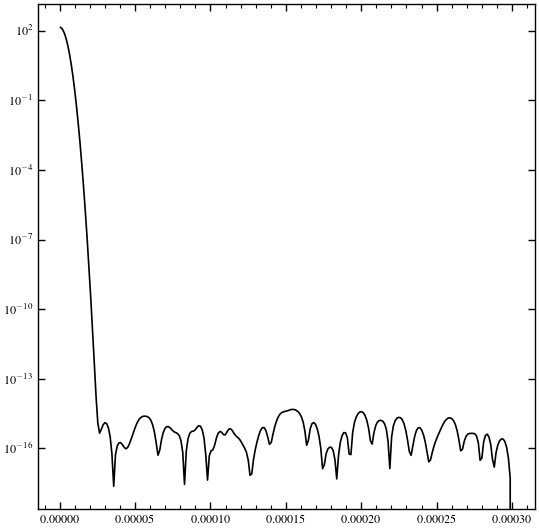

In [4]:
from felpy.model.beamlines.exfel_spb.methods import setup_spb
from felpy.model.source import SA1_Source
from felpy.model.mesh import Mesh
from wpg.wpg_uti_wf import plot_intensity_map


spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_GM_4.98.json",
                theta_KB = 5e-03, theta_HOM = 5.0e-03, crop = ['d1', 'd2'])




ValueError: x and y must have same first dimension, but have shapes (512,) and (2,)

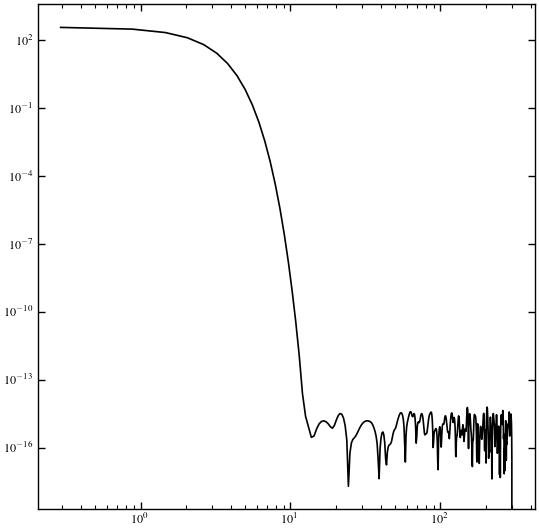

In [8]:
sa1 = SA1_Source(ekev = 9.2, q = 0.25, mesh = Mesh(nx = 1024, ny = 1024, nz = 5, xMin = -300e-06, xMax = 300e-06, yMin = -300e-06, yMax = 300e-06))

freq, s = sa1.wfr.spatial_power_spectral_density

grid = Grids()
grid.create_grid(1,1)
ax = grid.axes
ax.loglog(freq*1e6, s)
ax.plot(np.ones_like(freq)*0.055, np.arange(0,1e3,freq.shape[0]))


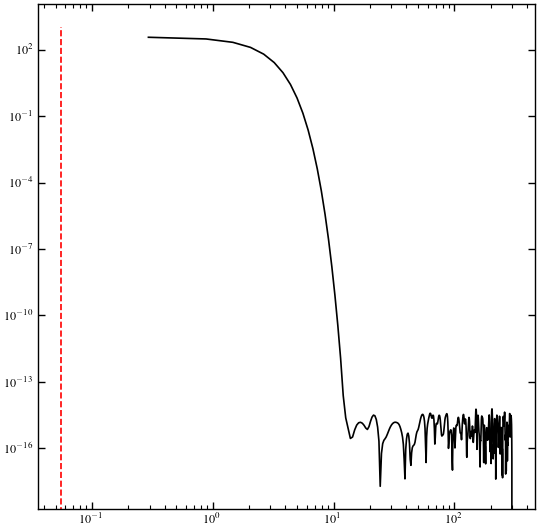

In [11]:
grid = Grids()
grid.create_grid(1,1)
ax = grid.axes
ax.loglog(freq*1e6, s)
ax.plot(np.ones_like(freq)*0.055, np.linspace(0,1e3,freq.shape[0]))

In [10]:
freq.shape[0]

512

In [9]:
plot_intensity_map(sa1.wfr.set_electric_field_representation('a'))

AttributeError: 'NoneType' object has no attribute 'get_intensity'

In [28]:
spb.bl.propagate(sa1.wfr)



NameError: name 'wfr' is not defined

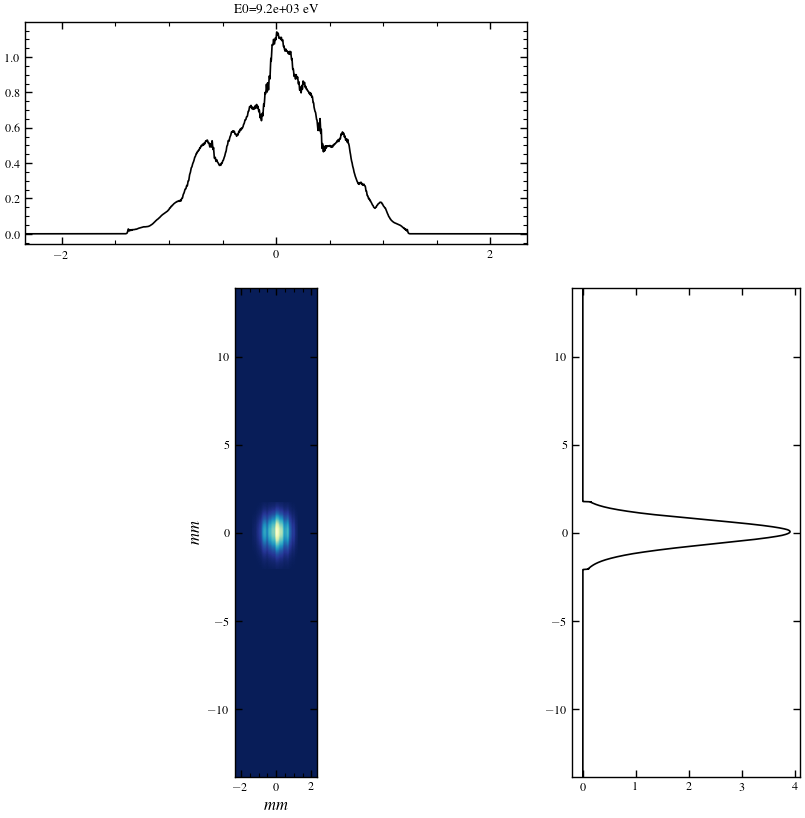

NameError: name 'FormatStrFormatter' is not defined

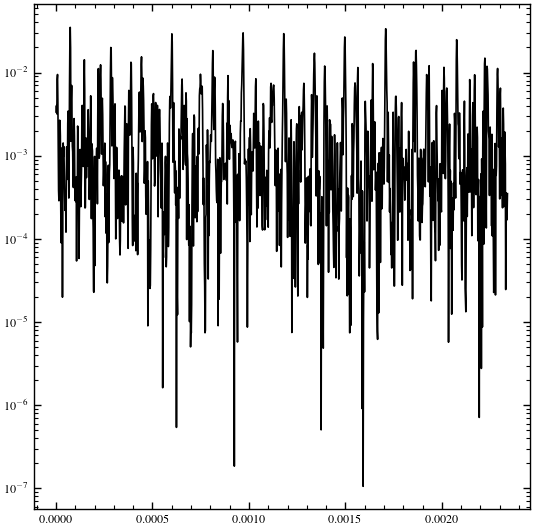

In [30]:
from felpy.utils.vis_utils import Grids

plot_intensity_map(sa1.wfr)
freq, s = sa1.wfr.spatial_power_spectral_density

grid = Grids()
grid.create_grid(1,1)
ax = grid.axes
ax.semilogy(freq, s)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.e'))

ax.set_ylabel("Power Spectral Density (W$m^{-3}s^{-1}$)")
grid.set_fontsize(22)